#Load Data


**Read Data**

In [1]:
!git clone https://github.com/VinAIResearch/PhoNER_COVID19

Cloning into 'PhoNER_COVID19'...
remote: Enumerating objects: 44, done.
remote: Counting objects: 100% (44/44), done.
remote: Compressing objects: 100% (30/30), done.
remote: Total 44 (delta 14), reused 30 (delta 12), pack-reused 0
Unpacking objects: 100% (44/44), done.


In [2]:
import pandas as pd

In [3]:
df_train = []
i = 1
for line in open("/content/PhoNER_COVID19/data/syllable/train_syllable.conll", "r").readlines():
  if len(line.split())<2:
    i+=1
  else:
    tmp = line.split()
    tmp.append('s'+str(i))
    df_train.append(tmp)

df_dev = []
i = 1
for line in open("/content/PhoNER_COVID19/data/syllable/dev_syllable.conll", "r").readlines():
  if len(line.split())<2:
    i+=1
  else:
    tmp = line.split()
    tmp.append('s'+str(i))
    df_dev.append(tmp)

df_test= []
i = 1
for line in open("/content/PhoNER_COVID19/data/syllable/test_syllable.conll", "r").readlines():
  if len(line.split())<2:
    i+=1
  else:
    tmp = line.split()
    tmp.append('s'+str(i))
    df_test.append(tmp)

In [4]:
data_train = pd.DataFrame(df_train, columns =['Word', 'Tag', 'Sentence#'])
data_dev = pd.DataFrame(df_dev, columns =['Word', 'Tag', 'Sentence#'])
data_test = pd.DataFrame(df_test, columns =['Word', 'Tag', 'Sentence#'])
# df = pd.DataFrame(df, columns =['Word', 'Tag', 'Sentence#'])

In [5]:
data_train['Word'].unique().shape

(3965,)

In [6]:
data_train.groupby(['Tag']).count()['Word']

Tag
B-AGE                       682
B-DATE                     2549
B-GENDER                    542
B-JOB                       205
B-LOCATION                 5398
B-NAME                      349
B-ORGANIZATION             1137
B-PATIENT_ID               3240
B-SYMPTOM_AND_DISEASE      1439
B-TRANSPORTATION            226
I-AGE                         2
I-DATE                     2500
I-GENDER                     14
I-JOB                       318
I-LOCATION                12309
I-NAME                       80
I-ORGANIZATION             4818
I-PATIENT_ID                 15
I-SYMPTOM_AND_DISEASE      2270
I-TRANSPORTATION             69
O                        129379
Name: Word, dtype: int64

In [7]:
len(pd.concat([data_train, data_dev, data_test])['Word'].unique())

5728

In [8]:
def concatWord(data):
  tuple_func = lambda f: [(w, t) for w, t in zip(f['Word'].values, f['Tag'].values)]
  sentences_with_tag = data.groupby('Sentence#').apply(tuple_func)
  print(sentences_with_tag)
  sentences_with_tag = [sent for sent in sentences_with_tag]
  return sentences_with_tag

sentences_with_tag_train=concatWord(data_train)
sentences_with_tag_dev=concatWord(data_dev)
sentences_with_tag_test=concatWord(data_test)

Sentence#
s1       [(Đồng, O), (thời, O), (,, O), (bệnh, O), (việ...
s10      [(Chiều, O), (22, B-DATE), (-, I-DATE), (4, I-...
s100     [(5, O), (người, O), (tiếp, O), (xúc, O), (gần...
s1000    [(Đây, O), (là, O), (bệnh, O), (nhân, O), (cuố...
s1001    [(Các, O), (mẫu, O), (bệnh, O), (phẩm, O), (gử...
                               ...                        
s995     [(Theo, O), (ông, O), (Nguyễn, O), (Trọng, O),...
s996     [(Một, O), (ca, O), (mắc, O), (COVID, O), (-, ...
s997     [(Tuy, O), (nhiên, O), (sau, O), (này, O), (mớ...
s998     [(Nếu, O), (đây, O), (là, O), (nguồn, O), (lây...
s999     [(Người, O), (đàn, O), (ông, O), (42, B-AGE), ...
Length: 5027, dtype: object
Sentence#
s1       [(Bác, O), (sĩ, O), (Nguyễn, O), (Trung, O), (...
s10      [(Hệ, B-SYMPTOM_AND_DISEASE), (miễn, I-SYMPTOM...
s100     [(Bốn, O), (bác, O), (sĩ, O), (,, O), (kỹ, O),...
s1000    [(Anh, O), (được, O), (làm, O), (liên, O), (ti...
s1001    [(Ca, O), (bệnh, O), (161, B-PATIENT_ID), ((, ...
        

In [113]:
sentences_train = [' '.join([word[0] for word in sent]) for sent in sentences_with_tag_train]
sentences_dev = [' '.join([word[0] for word in sent]) for sent in sentences_with_tag_dev]
sentences_test = [' '.join([word[0] for word in sent]) for sent in sentences_with_tag_test]
sentences_test[1]

'Theo đó bệnh nhân tên N.M.C. , là nhân viên ngân hàng tại 38 Hàng Da , phường Hàng Bông , quận Hoàn Kiếm .'

In [114]:
labels_train = [[word[1] for word in sent] for sent in sentences_with_tag_train]
labels_dev = [[word[1] for word in sent] for sent in sentences_with_tag_dev]
labels_test = [[word[1] for word in sent] for sent in sentences_with_tag_test]

In [11]:
min = 1000
for s in sentences_train:
  if min>len(s.split()):
    min = len(s.split())
print(min)


7


In [12]:
len(pd.concat([data_train, data_dev, data_test])['Word'].unique())

5728

In [13]:
# Augmentation
! pip install neraug

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 43 kB 2.2 MB/s 
  Created wheel for seqeval: filename=seqeval-1.2.2-py3-none-any.whl size=16180 sha256=fd79d0386cba408d6ccff4351c63cd6862d08f8649a1a60d3c02f41bcd6546d1
  Stored in directory: /root/.cache/pip/wheels/05/96/ee/7cac4e74f3b19e3158dce26a20a1c86b3533c43ec72a549fd7
Successfully built seqeval


In [14]:
!git clone https://github.com/VinAIResearch/PhoNLP
%cd PhoNLP
!pip3 install -e .

Cloning into 'PhoNLP'...
remote: Enumerating objects: 565, done.
remote: Counting objects: 100% (30/30), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 565 (delta 22), reused 11 (delta 11), pack-reused 535
Receiving objects: 100% (565/565), 591.02 KiB | 7.21 MiB/s, done.
Resolving deltas: 100% (285/285), done.
/content/PhoNLP
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Obtaining file:///content/PhoNLP
     |████████████████████████████████| 4.4 MB 27.1 MB/s 
     |████████████████████████████████| 6.6 MB 56.0 MB/s 
     |████████████████████████████████| 101 kB 12.9 MB/s 
     |████████████████████████████████| 596 kB 70.4 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
  Running setup.py develop for phonlp


In [15]:
%cd '/content/vncorenlp/PhoNLP/phonlp'
!wget 'https://public.vinai.io/phonlp.pt'

[Errno 2] No such file or directory: '/content/vncorenlp/PhoNLP/phonlp'
/content/PhoNLP
--2022-06-30 08:02:20--  https://public.vinai.io/phonlp.pt
Resolving public.vinai.io (public.vinai.io)... 52.85.151.101, 52.85.151.47, 52.85.151.26, ...
Connecting to public.vinai.io (public.vinai.io)|52.85.151.101|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 581522206 (555M) [binary/octet-stream]
Saving to: ‘phonlp.pt’

phonlp.pt           100%[===================>] 554.58M  15.8MB/s    in 36s     

2022-06-30 08:02:57 (15.5 MB/s) - ‘phonlp.pt’ saved [581522206/581522206]



In [16]:
import phonlp
# Load the trained PhoNLP model
model = phonlp.load(save_dir='/content/PhoNLP')

Loading model from: /content/PhoNLP/phonlp.pt


Downloading:   0%|          | 0.00/557 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/874k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.08M [00:00<?, ?B/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [18]:
# text = []
# for s in sentences_train:
#   text.append(model.annotate(text=s))

In [115]:
model.print_out(model.annotate(text=sentences_train[300]))

100%|██████████| 1/1 [00:00<00:00, 23.61it/s]

1	Thời	N	O	0	root
2	điểm	N	O	1	nmod
3	phát	V	O	1	nmod
4	hiện	V	O	3	vmod
5	đã	R	O	8	nmod
6	gần	A	O	1	prd
7	một	M	O	8	det
8	tuần	N	O	6	amod
9	kể	V	O	8	nmod
10	từ	E	O	9	vmod
11	ngày	N	O	10	pob
12	tiếp	V	O	11	nmod
13	xúc	V	O	12	vmod
14	và	Cc	O	1	coord
15	trong	E	O	23	tmp
16	thời	N	O	15	pob
17	gian	N	O	16	nmod
18	này	P	O	16	det
19	bác	N	O	23	sub
20	soát	V	O	19	nmod
21	vé	N	O	19	nmod
22	đã	R	O	23	adv
23	gặp	V	O	14	conj
24	gỡ	V	O	23	vmod
25	cả	T	O	27	nmod
26	trăm	M	O	27	det
27	người	N	O	23	dob
28	.	CH	O	1	punct


In [121]:
sentences_train[400]

'Nhiều trường hợp tiếp xúc với các bệnh nhân nhiễm COVID - 19 số 45 , 54 và bệnh nhân số 64 tại TP. HCM cũng có kết quả âm tính .'

In [119]:
model.print_out(model.annotate(text=sentences_train[400]))

100%|██████████| 1/1 [00:00<00:00, 25.33it/s]

1	Nhiều	A	O	2	nmod
2	trường	N	O	27	sub
3	hợp	V	O	2	nmod
4	tiếp	V	O	2	nmod
5	xúc	V	O	4	vmod
6	với	E	O	4	vmod
7	các	L	O	8	det
8	bệnh	N	O	6	pob
9	nhân	N	O	8	nmod
10	nhiễm	V	O	8	nmod
11	COVID	Ny	O	10	dob
12	-	CH	O	11	punct
13	19	M	O	11	det
14	số	N	O	8	nmod
15	45	M	O	14	det
16	,	CH	O	14	punct
17	54	M	O	14	det
18	và	Cc	O	8	nmod
19	bệnh	N	O	18	conj
20	nhân	N	O	19	nmod
21	số	N	O	19	nmod
22	64	M	O	21	det
23	tại	E	O	19	loc
24	TP.	Ny	B-LOC	23	pob
25	HCM	Np	I-LOC	24	nmod
26	cũng	R	O	27	adv
27	có	V	O	0	root
28	kết	N	O	27	dob
29	quả	N	O	28	nmod
30	âm	A	O	28	nmod
31	tính	N	O	30	amod
32	.	CH	O	27	punct


In [ ]:
model.print_out(model.annotate(text=sentences_train[800]))

In [22]:
model.print_out(model.annotate(text=sentences_train[900]))

100%|██████████| 1/1 [00:00<00:00, 29.33it/s]

1	Bệnh	N	O	10	sub
2	nhân	N	O	1	nmod
3	ngoài	N	O	1	loc
4	tỉnh	N	O	3	pob
5	thuộc	V	O	10	dep
6	diện	N	O	5	dob
7	cách	N	O	6	nmod
8	ly	V	O	7	vmod
9	sẽ	R	O	10	adv
10	được	V	O	0	root
11	cách	N	O	10	vmod
12	ly	V	O	11	vmod
13	điều	V	O	11	vmod
14	trị	V	O	13	vmod
15	tại	E	O	13	loc
16	bệnh	N	O	15	pob
17	viện	N	O	16	nmod
18	,	CH	O	10	punct
19	khi	N	O	23	tmp
20	bệnh	N	O	21	sub
21	ổn	A	O	19	nmod
22	định	V	O	21	vmod
23	có	V	O	10	dep
24	thể	N	O	23	vmod
25	chuyển	V	O	23	vmod
26	cách	N	O	25	dob
27	ly	V	O	26	nmod
28	tập	V	O	27	vmod
29	trung	A	O	28	vmod
30	cho	E	O	25	prp
31	đủ	A	O	30	dep
32	14	M	O	33	det
33	ngày	N	O	31	tmp
34	.	CH	O	10	punct


In [23]:
model.print_out(model.annotate(text='bố đã ăn cái bánh ở trên bàn'))

100%|██████████| 1/1 [00:00<00:00, 28.52it/s]

1	bố	N	O	3	sub
2	đã	R	O	3	adv
3	ăn	V	O	0	root
4	cái	Nc	O	3	dob
5	bánh	N	O	4	nmod
6	ở	E	O	4	loc
7	trên	N	O	6	pob
8	bàn	N	O	7	pob


In [24]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [25]:
import pickle

# with open('/content/drive/MyDrive/Colab Notebooks/dl_project-master/ner/dependency_parsing', 'wb') as fp:
#     pickle.dump(text, fp)

In [26]:
with open ('/content/drive/MyDrive/Colab Notebooks/dl_project-master/ner/dependency_parsing', 'rb') as fp:
    itemlist = pickle.load(fp)

In [27]:
len(itemlist)

5027

In [117]:
itemlist[0][-1]

[[['6', 'mnr'],
  ['6', 'tmp'],
  ['6', 'punct'],
  ['6', 'sub'],
  ['4', 'nmod'],
  ['0', 'root'],
  ['6', 'vmod'],
  ['6', 'vmod'],
  ['8', 'vmod'],
  ['11', 'det'],
  ['8', 'dob'],
  ['11', 'nmod'],
  ['11', 'prp'],
  ['13', 'vmod'],
  ['14', 'dob'],
  ['15', 'nmod'],
  ['16', 'nmod'],
  ['16', 'punct'],
  ['16', 'det'],
  ['8', 'mnr'],
  ['20', 'pob'],
  ['21', 'nmod'],
  ['21', 'nmod'],
  ['23', 'pob'],
  ['24', 'nmod'],
  ['24', 'nmod'],
  ['6', 'punct']]]

In [122]:
count = 0
allTag = []
for k in range(5027):
  tag = []
  for i in range(len(itemlist[k][-1][0])):
    assert len(sentences_train[k].split()) == len(itemlist[k][-1][0])
    # print(i, sentences_train[k].split()[i], itemlist[k][-1][0][i][0], itemlist[k][-1][0][i][-1])
    tag.append(itemlist[k][-1][0][i][-1])
  if 'sub' in tag and 'dob' in tag:
    count+=1
  allTag.append(tag)
  # print('----------')

print(count)

3662


In [123]:
len(allTag)

5027

In [124]:
import random

nlp_sens_train = []
nlp_labs_train = []
for i in range(len(allTag)):
  tag = allTag[i]
  if(len(tag)<1 or random.random()<0.7):
    continue
  tmp_sub=[]
  tmp_dob=[]
  t_sub=[]
  t_dob=[]
  for t in range(len(tag)):
    if 'dob' in tag:
      if tag[t]=='sub':
        tmp_sub=[]
        t_sub=[]
        # tmp_sub.append(tag[t])
        tmp_sub.append(sentences_train[i].split()[t])
        t_sub.append(t)
        n=1
        while(t+n<len(tag) and  'mod' in tag[t+n]):
          tmp_sub.append(sentences_train[i].split()[t+n])
          t_sub.append(t+n)
          n+=1
      if tag[t]=='dob' and 'N' in itemlist[i][-3][0][t][0]:
        tmp_dob=[]
        t_dob=[]
        tmp_dob.append(sentences_train[i].split()[t])
        t_dob.append(t)
        n=1
        while(t+n<len(tag) and 'mod' in tag[t+n]):
          tmp_dob.append(sentences_train[i].split()[t+n])
          t_dob.append(t+n)
          n+=1
  if len(tmp_dob)>0 and len(t_sub)>0:
    if t_dob[0]<t_sub[0]:
      tmp = t_sub
      t_sub = t_dob
      t_dob = tmp
  if len(tmp_dob)>0 and len(t_sub)>0:
    print(sentences_train[i])
    print(tmp_sub, tmp_dob, t_sub, t_dob)
    print(itemlist[i][-3][0][t_dob[0]:t_dob[-1]+1])
    # print(sentences_train[i].replace(' '.join(tmp_dob), '_tmp_').replace(' '.join(tmp_sub), ' '.join(tmp_dob)).replace('_tmp_', ' '.join(tmp_sub)))
    print(" ".join(sentences_train[i].split()[:t_sub[0]]+sentences_train[i].split()[t_dob[0]:t_dob[-1]+1]+sentences_train[i].split()[t_sub[-1]+1:t_dob[0]]+sentences_train[i].split()[t_sub[0]:t_sub[-1]+1]+sentences_train[i].split()[t_dob[-1]+1:]))
    print(" ".join(labels_train[i]))
    print(" ".join(labels_train[i][:t_sub[0]]+labels_train[i][t_dob[0]:t_dob[-1]+1]+labels_train[i][t_sub[-1]+1:t_dob[0]]+labels_train[i][t_sub[0]:t_sub[-1]+1]+labels_train[i][t_dob[-1]+1:]))
    print('======================================')
    nlp_sens_train.append(" ".join(sentences_train[i].split()[:t_sub[0]]+sentences_train[i].split()[t_dob[0]:t_dob[-1]+1]+sentences_train[i].split()[t_sub[-1]+1:t_dob[0]]+sentences_train[i].split()[t_sub[0]:t_sub[-1]+1]+sentences_train[i].split()[t_dob[-1]+1:]))
    nlp_labs_train.append(labels_train[i][:t_sub[0]]+labels_train[i][t_dob[0]:t_dob[-1]+1]+labels_train[i][t_sub[-1]+1:t_dob[0]]+labels_train[i][t_sub[0]:t_sub[-1]+1]+labels_train[i][t_dob[-1]+1:])

Streaming output truncated to the last 5000 lines.
O B-DATE O O O O B-SYMPTOM_AND_DISEASE O B-SYMPTOM_AND_DISEASE O O O O B-LOCATION I-LOCATION I-LOCATION I-LOCATION I-LOCATION I-LOCATION I-LOCATION I-LOCATION I-LOCATION I-LOCATION O O O O O O
Trong số bệnh nhân mới có 11 du khách nước ngoài đến Việt Nam trên chuyến bay VN54 , sau đó di chuyển đến nhiều nơi như Lào Cai , Quảng Ninh , Thừa Thiên Huế , Quảng Nam , Đà Nẵng .
['Trong'] ['du', 'khách', 'nước', 'ngoài', 'đến'] [0] [7, 8, 9, 10, 11]
[['N'], ['N'], ['N'], ['N'], ['V']]
du khách nước ngoài đến số bệnh nhân mới có 11 Trong Việt Nam trên chuyến bay VN54 , sau đó di chuyển đến nhiều nơi như Lào Cai , Quảng Ninh , Thừa Thiên Huế , Quảng Nam , Đà Nẵng .
O O O O O O O O O O O O B-LOCATION I-LOCATION O O O B-TRANSPORTATION O O O O O O O O O B-LOCATION I-LOCATION O B-LOCATION I-LOCATION O B-LOCATION I-LOCATION I-LOCATION O B-LOCATION I-LOCATION O B-LOCATION I-LOCATION O
O O O O O O O O O O O O B-LOCATION I-LOCATION O O O B-TRANSPORTATI

In [129]:
len(nlp_sens_train)

1108

In [127]:
sentences_train += nlp_sens_train
labels_train += nlp_labs_train

In [130]:
assert len(sentences_train)==len(labels_train)

In [131]:
from neraug.augmentator import LabelWiseTokenReplacement
from neraug.augmentator import MentionReplacement
from neraug.augmentator import ShuffleWithinSegment

from neraug.scheme import IOBES

In [132]:
from neraug.augmentator import (
    DictionaryReplacement,
    LabelWiseTokenReplacement,
    MentionReplacement,
    ShuffleWithinSegment,
)
from neraug.scheme import IOBES


def test_mention_replacement(x_train, y_train, x, y, n):
    # x_train = [["I", "went", "to0", "Osaka"], ["Aaka"], ["3","2",'BLUT']]
    # y_train = [["O", "O", "S-me", "I-LOuuC"], ["I-LOuuC"], ['O','O',"I-LOuuC"]]
    augmentator = MentionReplacement(x_train, y_train, IOBES)
    # n = 3
    # x = ["I", "went", "to", "Tokyo"]
    # y = ["O", "O", "S-me", "S-LOuuC"]
    x_augs, y_augs = augmentator.augment(x, y, n=n)

    return x_augs, y_augs


def test_label_with_replacement(x_train, y_train, x, y, n):
    # x_train = [["I"]]
    # y_train = [["O"]]
    augmentator = LabelWiseTokenReplacement(x_train, y_train, p=0.1)
    # n = 3
    # x = ["I", "went"]
    # y = ["O", "O"]
    x_augs, y_augs = augmentator.augment(x, y, n=n)
    # print(x_augs, y_augs)
    return x_augs, y_augs


def test_shuffle_replacement(x, y):
    augmentator = ShuffleWithinSegment(IOBES, p=1)
    n =1
    # x = ["I"]
    # y = ["O", "O", "O", "LOC"]
    x_augs, y_augs = augmentator.augment(x, y, n=n)
    # print(x_augs, y_augs)
    return x_augs, y_augs


In [ ]:
# test_label_with_replacement()

# Data Augmentation

In [133]:
# listTag=['B-ORGANIZATION', 'I-ORGANIZATION', 'B-SYMPTOM_AND_DISEASE', 'I-SYMPTOM_AND_DISEASE', 'B-LOCATION',
# 'B-DATE', 'B-PATIENT_ID', 'B-AGE', 'B-NAME', 'I-DATE', 'B-JOB', 'I-LOCATION', 'B-TRANSPORTATION', 'B-GENDER', 
# 'I-TRANSPORTATION', 'I-JOB', 'I-NAME', 'I-AGE', 'I-PATIENT_ID',]
listTag=['B-NAME', 'B-GENDER', 'B-AGE',
        #  'I-TRANSPORTATION',
         ]
x_train=[[] for i in range(len(listTag))]
y_train=[[] for i in range(len(listTag))]
for j, tag in enumerate(listTag):
  for i in range(len(sentences_train)):
    if tag in labels_train[i]:
      if len(sentences_train[i].split()) == len(labels_train[i]):
        x_train[j].append(sentences_train[i].split())
        y_train[j].append(list(map(lambda x: x.replace(tag, "S"+tag[1:]), labels_train[i])))

listTag2=['B-ORGANIZATION', 'B-SYMPTOM_AND_DISEASE',
          'B-TRANSPORTATION', 'B-JOB',
          # 'I-ORGANIZATION',
          # 'I-SYMPTOM_AND_DISEASE',
          ]
x_train2=[[] for i in range(len(listTag2))]
y_train2=[[] for i in range(len(listTag2))]
for j, tag in enumerate(listTag2):
  for i in range(len(sentences_train)):
    if tag in labels_train[i]:
      if len(sentences_train[i].split()) == len(labels_train[i]):
        x_train2[j].append(sentences_train[i].split())
        y_train2[j].append(list(map(lambda x: x.replace(tag, "S"+tag[1:]), labels_train[i])))

listTag3=['B-DATE', 'B-LOCATION', 'B-PATIENT_ID',
          # 'I-DATE', 'I-LOCATION', 
          # 'I-ORGANIZATION', 
          ]
x_train3=[[] for i in range(len(listTag3))]
y_train3=[[] for i in range(len(listTag3))]
for j, tag in enumerate(listTag3):
  for i in range(len(sentences_train)):
    if tag in labels_train[i]:
      if len(sentences_train[i].split()) == len(labels_train[i]):
        x_train3[j].append(sentences_train[i].split())
        y_train3[j].append(list(map(lambda x: x.replace(tag, "S"+tag[1:]), labels_train[i])))



In [ ]:
import random

augmentation_sentences = []
augmentation_labels = []
for j, tag in enumerate(listTag):
  for i in range(len(sentences_train)):
    if tag in labels_train[i] and random.random()<1:
      S_label=list(map(lambda x: x.replace(tag, "S"+tag[1:]), labels_train[i]))
      x, y=test_mention_replacement(x_train[j], y_train[j], 
                                    sentences_train[i].split(), S_label, 15)
      # x, y = test_shuffle_replacement(sentences_train[i].split(), S_label)
      for k in range(len(x)):
          augmentation_sentences.append(" ".join(x[k]))
          augmentation_labels.append(list(map(lambda x: x.replace("S"+tag[1:], tag), y[k])))
#################################

augmentation_sentences2 = []
augmentation_labels2 = []
for j, tag in enumerate(listTag2):
  for i in range(len(sentences_train)):
    if tag in labels_train[i] and random.random()<1:
      S_label=list(map(lambda x: x.replace(tag, "S"+tag[1:]), labels_train[i]))
      x, y=test_mention_replacement(x_train2[j], y_train2[j], 
                                    sentences_train[i].split(), S_label, 35)
      # x, y = test_shuffle_replacement(sentences_train[i].split(), S_label)
      for k in range(len(x)):
          augmentation_sentences2.append(" ".join(x[k]))
          augmentation_labels2.append(list(map(lambda x: x.replace("S"+tag[1:], tag), y[k])))
#######################################
augmentation_sentences3 = []
augmentation_labels3 = []
for j, tag in enumerate(listTag3):
  for i in range(len(sentences_train)):
    if tag in labels_train[i] and random.random()<0.15:
      S_label=list(map(lambda x: x.replace(tag, "S"+tag[1:]), labels_train[i]))
      x, y=test_mention_replacement(x_train3[j], y_train3[j], 
                                    sentences_train[i].split(), S_label, 10)
      # x, y = test_shuffle_replacement(sentences_train[i].split(), S_label)
      for k in range(len(x)):
          augmentation_sentences3 .append(" ".join(x[k]))
          augmentation_labels3.append(list(map(lambda x: x.replace("S"+tag[1:], tag), y[k])))
      
      

In [ ]:
print(len(augmentation_sentences), len(augmentation_sentences2), len(augmentation_sentences3))
print(len(augmentation_labels), len(augmentation_labels2), len(augmentation_labels3))
sentences_train += augmentation_sentences + augmentation_sentences2 + augmentation_sentences3
labels_train += augmentation_labels + augmentation_labels2 + augmentation_labels3

21030 70315 10330
21030 70315 10330


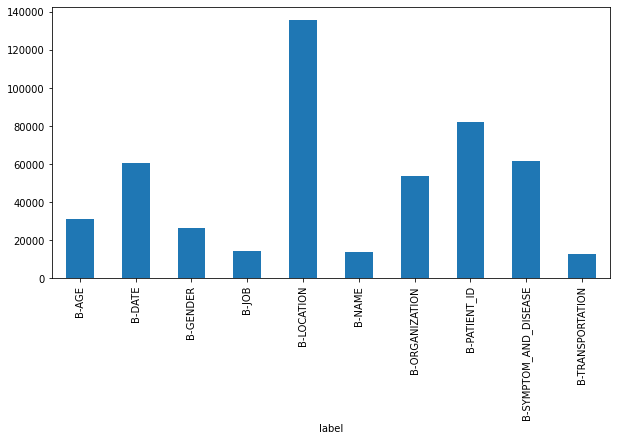

In [ ]:
import numpy as np
from operator import add
from functools import reduce

x=np.array([x for xs in labels_train for x in xs])
df = pd.DataFrame({'label': x})
x=df[df['label'].str[0]=='B'].groupby(['label'])['label'].count()
x.plot(kind='bar', figsize=(10,5), legend=False)

In [ ]:
label2idx = {k: v for v, k in enumerate(data_train.Tag.unique())}
ids_to_labels = {v: k for v, k in enumerate(data_train.Tag.unique())}
label2idx['PAD']=20
label2idx['[CLS]']=21
label2idx['[SEP]']=22
label2idx['X']=23
ids_to_labels[20]='PAD'
ids_to_labels[21]='[CLS]'
ids_to_labels[22]='[SEP]'
ids_to_labels[23]='X'

In [ ]:
ids_to_labels

{0: 'O',
 1: 'B-ORGANIZATION',
 2: 'I-ORGANIZATION',
 3: 'B-SYMPTOM_AND_DISEASE',
 4: 'I-SYMPTOM_AND_DISEASE',
 5: 'B-LOCATION',
 6: 'I-LOCATION',
 7: 'B-DATE',
 8: 'B-PATIENT_ID',
 9: 'B-AGE',
 10: 'B-NAME',
 11: 'I-DATE',
 12: 'B-JOB',
 13: 'I-JOB',
 14: 'B-TRANSPORTATION',
 15: 'B-GENDER',
 16: 'I-GENDER',
 17: 'I-TRANSPORTATION',
 18: 'I-NAME',
 19: 'I-AGE',
 20: 'PAD',
 21: '[CLS]',
 22: '[SEP]',
 23: 'X'}

In [ ]:
labels_value = ['PAD', '[CLS]', '[SEP]', 'X']+data_train.Tag.unique().tolist()

In [ ]:
labels_value

['PAD',
 '[CLS]',
 '[SEP]',
 'X',
 'O',
 'B-ORGANIZATION',
 'I-ORGANIZATION',
 'B-SYMPTOM_AND_DISEASE',
 'I-SYMPTOM_AND_DISEASE',
 'B-LOCATION',
 'I-LOCATION',
 'B-DATE',
 'B-PATIENT_ID',
 'B-AGE',
 'B-NAME',
 'I-DATE',
 'B-JOB',
 'I-JOB',
 'B-TRANSPORTATION',
 'B-GENDER',
 'I-GENDER',
 'I-TRANSPORTATION',
 'I-NAME',
 'I-AGE',
 'I-PATIENT_ID']

In [ ]:
# # labels_value = ['B-pr','I-pr','O', 'PAD', '[CLS]', '[SEP]', 'X']
# label2idx = {label:indx for indx, label in enumerate(labels_value)}
# label2idx

In [ ]:
len(sentences_train)

106702

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Embedding


In [ ]:
#charLevel
encoded_train_c = [[one_hot((' '.join(list(c))).strip(), 100, filters='', lower=False) for c in d.split()] for d in sentences_train]
encoded_dev_c = [[one_hot((' '.join(list(c))).strip(), 100, filters='', lower=False) for c in d.split()] for d in sentences_dev]
encoded_test_c = [[one_hot((' '.join(list(c))).strip(), 100, filters='', lower=False) for c in d.split()] for d in sentences_test]

# padded_train_c = [ pad_sequences(w, maxlen=5, padding='post') for w in encoded_train_c]
# padded_dev_c = [ pad_sequences(w, maxlen=5, padding='post') for w in encoded_dev_c]
# padded_test_c = [ pad_sequences(w, maxlen=5, padding='post') for w in encoded_test_c]

padded_train_c = [ pad_sequences(w, maxlen=5, padding='post') for w in encoded_train_c]
padded_dev_c = [ pad_sequences(w, maxlen=5, padding='post') for w in encoded_dev_c]
padded_test_c = [ pad_sequences(w, maxlen=5, padding='post') for w in encoded_test_c]

In [ ]:
max_length = 50

In [ ]:
padded_train_cc = pad_sequences(padded_train_c, maxlen=max_length, padding='post')
padded_dev_cc = pad_sequences(padded_dev_c, maxlen=max_length, padding='post')
padded_test_cc = pad_sequences(padded_test_c, maxlen=max_length, padding='post')

In [ ]:
vocab_size = 4000
encoded_train = [one_hot(d, vocab_size, filters='', lower=False) for d in sentences_train]
encoded_dev = [one_hot(d, vocab_size, filters='', lower=False) for d in sentences_dev]
encoded_test = [one_hot(d, vocab_size, filters='', lower=False) for d in sentences_test]

In [ ]:
max_length = 50
padded_train = pad_sequences(encoded_train, maxlen=max_length, padding='post')
padded_dev = pad_sequences(encoded_dev, maxlen=max_length, padding='post')
padded_test = pad_sequences(encoded_test, maxlen=max_length, padding='post')

In [ ]:
encode_label_train = [[label2idx[i] for i in sent] for sent in labels_train]
encode_label_dev = [[label2idx[i] for i in sent] for sent in labels_dev]
encode_label_test = [[label2idx[i] for i in sent] for sent in labels_test]

In [ ]:
padded_label_train = pad_sequences(encode_label_train, maxlen=max_length, padding='post')
padded_label_dev = pad_sequences(encode_label_dev, maxlen=max_length, padding='post')
padded_label_test = pad_sequences(encode_label_test, maxlen=max_length, padding='post')

In [ ]:
padded_dev.shape

(2000, 50)

In [ ]:
!pip install tf-crf-layer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from tf_crf_layer.layer import CRF
from tf_crf_layer.loss import crf_loss
from tf_crf_layer.metrics import crf_accuracy
from tensorflow.keras.layers import Bidirectional, Embedding, LSTM, TimeDistributed, Conv1D, Dropout, Input, MaxPooling1D, Concatenate, Reshape
from tensorflow.keras.models import Sequential
import keras

In [ ]:
embeded_vector_size = 50
# model = Sequential()
# model.add(Embedding(vocab_size, embeded_vector_size, input_length=max_length, name="embedding"))
# model.add(Conv1D(filters=32, kernel_size=3, padding="same",))
# model.add(MaxPooling1D(pool_size=1))
# model.add(Bidirectional(LSTM(200, return_sequences=True,
#                              dropout=0.4, 
#                              recurrent_dropout=0.4, 
#                              kernel_initializer=keras.initializers.he_normal())))
# model.add(Bidirectional(LSTM(200, return_sequences=True,
#                              dropout=0.4, 
#                              recurrent_dropout=0.4, 
#                              kernel_initializer=keras.initializers.he_normal())))
# model.add(TimeDistributed(Dense(200)))
# model.add(TimeDistributed(Dropout(0.4)))
# model.add(CRF(len(label2idx)))
ip1 = Input(shape=(padded_train.shape[1])) # input word
concat = Concatenate(axis=2)
emb_layer = Embedding(vocab_size, embeded_vector_size*2, input_length=max_length, name="embeddingword")
out1 = emb_layer(ip1)

ip2 = Input(shape=(250))
emb_layer2 = Embedding(100, 10, input_length=8, name="embeddingcharlevel")
biLSTM_char = Bidirectional(LSTM(10, return_sequences=True,
                             dropout=0.25, 
                             recurrent_dropout=0.25, 
                             kernel_initializer=keras.initializers.he_normal()))
ipx2 = emb_layer2(ip2)  # input char
ipx2 = biLSTM_char(ipx2)
rs = Reshape((50, -1))
ipx2 = rs(ipx2)

out1 = concat([out1, ipx2]) 

cnn_layer = Conv1D(filters=32, kernel_size=3, padding="same",)
out2 = cnn_layer(out1)
polling = MaxPooling1D(pool_size=1)
out3 = polling(out2)

biLSTM = Bidirectional(LSTM(200, return_sequences=True,
                             dropout=0.25, 
                             recurrent_dropout=0.25, 
                             kernel_initializer=keras.initializers.he_normal()))
out5 = biLSTM(out3)

td_layer = TimeDistributed(Dense(200))
drop_layer = TimeDistributed(Dropout(0.25))
out6 = td_layer(out5)
out7 = drop_layer(out6)

crf_layer = CRF(len(label2idx))
out8 = crf_layer(out7)

model = keras.Model(inputs=[ip1, ip2] , outputs=out8)
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 250)]        0           []                               
                                                                                                  
 embeddingcharlevel (Embedding)  (None, 250, 10)     1000        ['input_6[0][0]']                
                                                                                                  
 input_5 (InputLayer)           [(None, 50)]         0           []                               
                                                                                                  
 bidirectional_4 (Bidirectional  (None, 250, 20)     1680        ['embeddingcharlevel[0][0]']     
 )                                                                                          

In [ ]:
padded_train_cc.shape

(106702, 50, 5)

In [ ]:
from keras import backend as K

def recall(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_score(y_true, y_pred):
    p = precision(y_true, y_pred)
    r = recall(y_true, y_pred)
    return 2*((p*r)/(p+r+K.epsilon()))

In [ ]:
from tensorflow import keras
opt = keras.optimizers.Adam(learning_rate=0.0015)

In [ ]:
model.compile(optimizer=opt, loss=crf_loss, metrics=f1_score)

In [ ]:
model.fit([padded_train, padded_train_cc.reshape(padded_train_cc.shape[0], -1)], padded_label_train, epochs=1, verbose=1, 
          validation_data=([padded_dev, padded_dev_cc.reshape(padded_dev_cc.shape[0], -1)], padded_label_dev))

<tf_crf_layer.layer.CRF object at 0x7f9f1806cc90> 0
<tf_crf_layer.layer.CRF object at 0x7f9f1806cc90> 0
2894/3335 [=========================>....] - ETA: 16:52 - loss: 1.8759 - f1_score: 0.9755

KeyboardInterrupt: ignored

#Model

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
model.save("/content/drive/MyDrive/Colab Notebooks/dl_project-master/ner_product/best_LSTM_ner_syllable.h5")
# model = keras.models.load_model("/content/drive/MyDrive/Colab Notebooks/dl_project-master/ner_product/best_LSTM_ner.h5", custom_objects={"f1_score": f1_score})

In [ ]:
# model.evaluate([padded_test, padded_test_cc.reshape(padded_test_cc.shape[0], -1)], padded_label_test)

In [ ]:
# reconstructed_model.evaluate(padded_test, padded_label_test)

In [ ]:
predicts =  model.predict([padded_test, padded_test_cc.reshape(padded_test_cc.shape[0], -1)])
# predicts = np.argmax(predicts, axis=-1)

In [ ]:
true=[ids_to_labels[padded_label_test[0:].flatten()[i]] for i in range(padded_test[0:].flatten().shape[0])]
pred=[ids_to_labels[predicts[0:].flatten()[i]] for i in range(padded_test[0:].flatten().shape[0])]

In [ ]:
from sklearn.metrics import confusion_matrix
corr=confusion_matrix(true, pred,labels=[ids_to_labels[i] for i in range(24)], normalize='true')

In [ ]:
import argparse
import numpy as np
import matplotlib.pyplot as plt

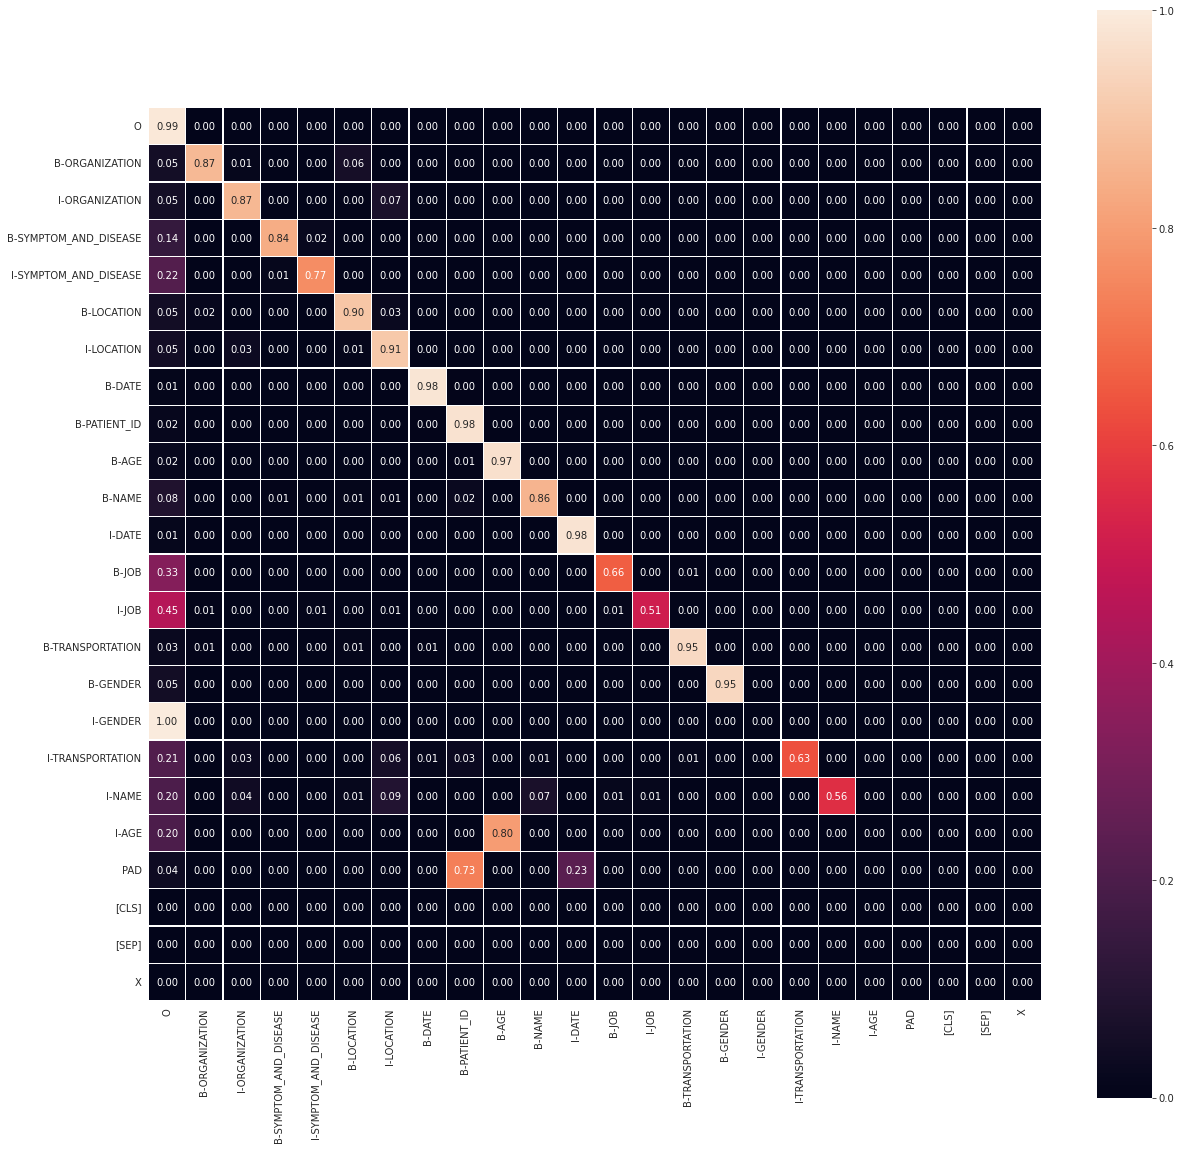

In [ ]:
import seaborn as sns; 
# ax = sns.heatmap(corr, annot=True, fmt="d",linewidths=1)

with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(20, 20))
    ax = sns.heatmap(corr, annot=True, fmt = '.2f', linewidths=0.1, square=True,
                     xticklabels=[ids_to_labels[i] for i in range(24)],
                     yticklabels=[ids_to_labels[i] for i in range(24)])